<a href="https://colab.research.google.com/github/SAMYSOSERIOUS/Stats-analytics/blob/main/DataDay12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load wine Data**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - accuracy: 0.3066 - loss: 45.0990 - val_accuracy: 0.4138 - val_loss: 18.9793
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3991 - loss: 12.8875 - val_accuracy: 0.3448 - val_loss: 22.2483
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2989 - loss: 21.3763 - val_accuracy: 0.2414 - val_loss: 16.0995
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3016 - loss: 14.2728 - val_accuracy: 0.3448 - val_loss: 7.2912
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3212 - loss: 5.1698 - val_accuracy: 0.4138 - val_loss: 7.0114
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3991 - loss: 7.3422 - val_accuracy: 0.6207 - val_loss: 1.4532
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4878 - loss: 2.4660 - val_accuracy: 0.4483 - val_loss: 5.5462
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4541 - loss: 4.8538 - val_accuracy: 0.6207 - val_loss:

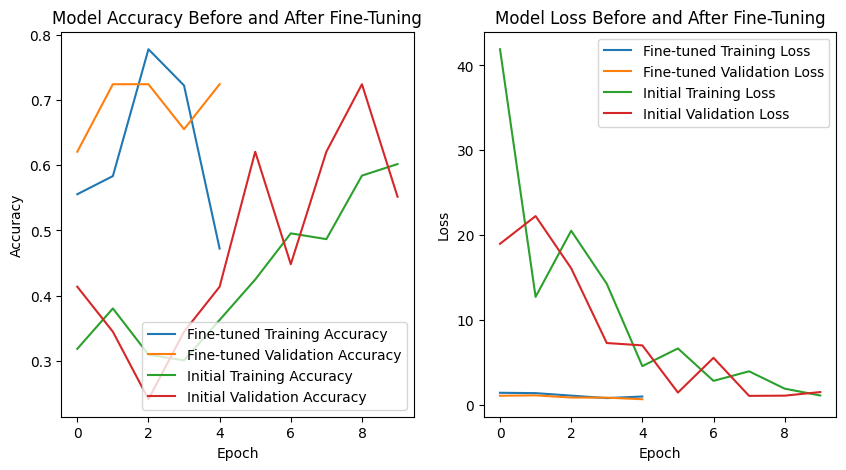

In [16]:

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

wine = load_wine()
x, y = wine.data, wine.target

x_train_initial, x_new, y_train_initial, y_new = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_initial, y_train_initial, test_size=0.2, random_state=42)

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_new = to_categorical(y_new)

def create_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=input_shape),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_model(x_train.shape[1:])
initial_history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

history_fine_tune = model.fit(x_new, y_new, epochs=5, batch_size=32, validation_data=(x_val, y_val))

loss, accuracy = model.evaluate(x_val, y_val, verbose=0)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")


figure, ax = plt.subplots(1, 2, figsize=(10, 5))


ax[0].plot(history_fine_tune.history['accuracy'], label='Fine-tuned Training Accuracy')

ax[0].plot(history_fine_tune.history['val_accuracy'], label='Fine-tuned Validation Accuracy')
ax[0].plot(initial_history.history['accuracy'], label='Initial Training Accuracy')
ax[0].plot(initial_history.history['val_accuracy'], label='Initial Validation Accuracy')
ax[0].set_title('Model Accuracy Before and After Fine-Tuning')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(loc='lower right')

ax[1].plot(history_fine_tune.history['loss'], label='Fine-tuned Training Loss')
ax[1].plot(history_fine_tune.history['val_loss'], label='Fine-tuned Validation Loss')
ax[1].plot(initial_history.history['loss'], label='Initial Training Loss')
ax[1].plot(initial_history.history['val_loss'], label='Initial Validation Loss')
ax[1].set_title('Model Loss Before and After Fine-Tuning')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(loc='upper right')

plt.show()